# Lab Assignment 2

The spirit of data science includes exploration, traversing the unknown, and applying a deep understanding of the challenge you're facing. In an academic setting, it's hard to duplicate these tasks, but this lab will attempt to take a few steps away from the traditional, textbook, "plug the equation in" pattern, so you can get a taste of what analyzing data in the real world is all about.

After the September 11 attacks, a series of secret regulations, laws, and processes were enacted, perhaps to better protect the citizens of the United States. These processes continued through president Bush's term and were renewed and and strengthened during the Obama administration. Then, on May 24, 2006, the United States Foreign Intelligence Surveillance Court (FISC) made a fundamental shift in its approach to Section 215 of the Patriot Act, permitting the FBI to compel production of "business records" relevant to terrorism investigations, which are shared with the NSA. The court now defined as business records the entirety of a telephone company's call database, also known as Call Detail Records (CDR or metadata).

News of this came to public light after an ex-NSA contractor leaked the information, and a few more questions were raised when it was further discovered that not just the call records of suspected terrorists were being collected in bulk... but perhaps the entirety of Americans as a whole. After all, if you know someone who knows someone who knows someone, your private records are relevant to a terrorism investigation. The white house quickly reassured the public in a press release that "Nobody is listening to your telephone calls," since, "that's not what this program is about." The public was greatly relieved.

The questions you'll be exploring in this lab assignment using K-Means are: exactly how useful is telephone metadata? It must have some use, otherwise the government wouldn't have invested however many millions they did into it secretly collecting it from phone carriers. Also what kind of intelligence can you extract from CDR metadata besides its face value?

You will be using a sample CDR dataset generated for 10 people living in the Dallas, Texas metroplex area. Your task will be to attempt to do what many researchers have already successfully done - partly de-anonymize the CDR data. People generally behave in predictable manners, moving from home to work with a few errands in between. With enough call data, given a few K-locations of interest, K-Means should be able to isolate rather easily the geolocations where a person spends the most of their time.

Note: to safeguard from doxing people, the CDR dataset you'll be using for this assignment was generated using the tools available in the Dive Deeper section. CDRs are at least supposed to be protected by privacy laws, and are the basis for proprietary revenue calculations. In reality, there are quite a few public CDRs out there. Much information can be discerned from them such as social networks, criminal acts, and believe it or not, even the spread of decreases as was demonstrated by Flowminder Foundation paper on Ebola. 

1. Open up the starter code in /Module5/assignment2.py and read through it all. It's long, so make sure you understand everything that is being asked for you before proceeding.
2. Load up the CDR dataset from /Module5/Datasets/CDR.csv. Do your due diligence to make sure it's been loaded correctly and all the features and rows match up.
3. Pick the first unique user in the list to examine. Follow the steps in the assignment file to approximate where the user lives.
4. Once you have a (Latitude, Longitude) coordinate pair, drop them into Google Maps. Just do a search for the "{Lat, Lon}". So if your centroid is located at Longitude = -96.949246 and Latitude = 32.953856, then do a maps search for "32.953856, -96.949246".
5. Answer the questions below.

In [25]:
# import
import pandas as pd
import numpy as np

from sklearn.cluster import KMeans
#from sklearn.datasets import load_boston

import matplotlib
import matplotlib.pyplot as plt

matplotlib.style.use('ggplot') # Look Pretty

%matplotlib notebook

In [3]:
def showandtell(title=None):
  if title != None: plt.savefig(title + ".png", bbox_inches='tight', dpi=300)
  plt.show()
  #exit()

In [4]:
# INFO: This dataset has call records for 10 users tracked over the course of 3 years.
# Your job is to find out where the users likely live and work at!

# TODO: Load up the dataset and take a peek at its head
# Convert the date using pd.to_datetime, and the time using pd.to_timedelta

dataFile = r'C:\Users\ng35019\Documents\Training\python_for_ds\Module5Clustering\Datasets\CDR.csv'
df = pd.read_csv(dataFile); 
df.CallDate = pd.to_datetime(df.CallDate)
df.CallTime = pd.to_timedelta(df.CallTime)
df

,In,Out,Direction,CallDate,CallTime,DOW,Duration,TowerID,TowerLat,TowerLon
0,4638472273,2666307251,Incoming,2010-12-25,07:16:24.736813,Sat,0:02:41.741499,0db53dd3-eb9c-4344-abc5-c2d74ebc3eec,32.731611,-96.709417
1,4638472273,1755442610,Incoming,2010-12-25,21:18:30.053710,Sat,0:02:47.108750,aeaf8b43-8034-44fe-833d-31854a75acbf,32.731722,-96.709500
2,4638472273,5481755331,Incoming,2010-12-25,14:52:42.878016,Sat,0:04:35.356341,fadaa83f-6001-45fd-aa4a-17d6c6b7ec00,32.899944,-96.910389
3,4638472273,1755442610,Incoming,2010-12-25,16:02:09.001913,Sat,0:02:23.498499,fadaa83f-6001-45fd-aa4a-17d6c6b7ec00,32.899944,-96.910389
4,4638472273,2145623768,Incoming,2010-12-25,15:28:35.028554,Sat,0:03:54.692497,95d7920d-c3cd-4d20-a568-9a55800dc807,32.899944,-96.910389
5,4638472273,2946222380,Incoming,2010-12-25,11:38:17.275327,Sat,0:03:06.670355,95c91e8b-6ff1-4893-9df3-b0342636bd25,32.899944,-96.910389
6,4638472273,7841019020,Missed,2010-12-25,10:38:35.924232,Sat,0:02:02.855268,fadaa83f-6001-45fd-aa4a-17d6c6b7ec00,32.899944,-96.910389
7,1559410755,6092528894,Missed,2010-12-25,15:15:56.502972,Sat,0:11:52.952187,b4319acf-b475-4c3e-a2e0-03b2dd2daf9e,32.696722,-96.934306
8,1559410755,6092528894,Incoming,2010-12-25,20:15:19.667734,Sat,0:11:52.951080,f958754c-3d55-47c4-8236-50b964a7b997,32.870972,-96.923556
9,1559410755,8125446700,Missed,2010-12-25,10:01:02.162977,Sat,0:14:11.046844,07dec2d7-b5d1-410d-8879-ecf7385af719,32.696083,-96.934333


In [5]:
# TODO: Get a distinct list of "In" phone numbers (users) and store the values in a
# regular python list.
# Hint: https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.tolist.html

In = df.In.unique().tolist(); In

[4638472273,
 1559410755,
 4931532174,
 2419930464,
 1884182865,
 3688089071,
 4555003213,
 2068627935,
 2894365987,
 8549533077]

In [6]:
# TODO: Create a slice called user1 that filters to only include dataset records where the
# "In" feature (user phone number) is equal to the first number on your unique list above

user1 = df[df.In == In[0]]; user1

,In,Out,Direction,CallDate,CallTime,DOW,Duration,TowerID,TowerLat,TowerLon
0,4638472273,2666307251,Incoming,2010-12-25,07:16:24.736813,Sat,0:02:41.741499,0db53dd3-eb9c-4344-abc5-c2d74ebc3eec,32.731611,-96.709417
1,4638472273,1755442610,Incoming,2010-12-25,21:18:30.053710,Sat,0:02:47.108750,aeaf8b43-8034-44fe-833d-31854a75acbf,32.731722,-96.709500
2,4638472273,5481755331,Incoming,2010-12-25,14:52:42.878016,Sat,0:04:35.356341,fadaa83f-6001-45fd-aa4a-17d6c6b7ec00,32.899944,-96.910389
3,4638472273,1755442610,Incoming,2010-12-25,16:02:09.001913,Sat,0:02:23.498499,fadaa83f-6001-45fd-aa4a-17d6c6b7ec00,32.899944,-96.910389
4,4638472273,2145623768,Incoming,2010-12-25,15:28:35.028554,Sat,0:03:54.692497,95d7920d-c3cd-4d20-a568-9a55800dc807,32.899944,-96.910389
5,4638472273,2946222380,Incoming,2010-12-25,11:38:17.275327,Sat,0:03:06.670355,95c91e8b-6ff1-4893-9df3-b0342636bd25,32.899944,-96.910389
6,4638472273,7841019020,Missed,2010-12-25,10:38:35.924232,Sat,0:02:02.855268,fadaa83f-6001-45fd-aa4a-17d6c6b7ec00,32.899944,-96.910389
71,4638472273,5912117253,Incoming,2010-12-26,14:34:27.530327,Sun,0:06:34.154104,84844bb1-1d36-4401-abf4-a3c566c07630,32.895833,-96.901944
72,4638472273,2145623768,Incoming,2010-12-26,20:45:00.306964,Sun,0:03:35.283608,26f7441e-e64b-4b9d-8c5a-0eb34f7e919f,32.731611,-96.709417
73,4638472273,4551601645,Missed,2010-12-26,16:03:43.841914,Sun,0:04:15.182895,bf3bf815-3795-4be6-bec3-12b8f713e50d,32.899944,-96.910389


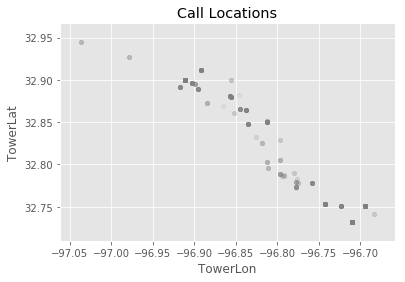

In [7]:
# INFO: Plot all the call locations
user1.plot.scatter(x='TowerLon', y='TowerLat', c='gray', alpha=0.1, title='Call Locations')
showandtell()  # Comment this line out when you're ready to proceed

In [36]:
# On Week End days:
#   1. People probably don't go into work
we = user1[(user1.DOW == 'Sat') | (user1.DOW == 'Sun')]
#   2. They probably sleep in late on Saturday
we = we[(we.CallTime < '06:00:00') | (we.CallTime > '10:00:00')]; we

#   3. They probably run a bunch of random errands, since they couldn't during the week
#   4. They should be home, at least during the very late hours, e.g. 1-4 AM

,In,Out,Direction,CallDate,CallTime,DOW,Duration,TowerID,TowerLat,TowerLon
1,4638472273,1755442610,Incoming,2010-12-25,21:18:30.053710,Sat,0:02:47.108750,aeaf8b43-8034-44fe-833d-31854a75acbf,32.731722,-96.709500
2,4638472273,5481755331,Incoming,2010-12-25,14:52:42.878016,Sat,0:04:35.356341,fadaa83f-6001-45fd-aa4a-17d6c6b7ec00,32.899944,-96.910389
3,4638472273,1755442610,Incoming,2010-12-25,16:02:09.001913,Sat,0:02:23.498499,fadaa83f-6001-45fd-aa4a-17d6c6b7ec00,32.899944,-96.910389
4,4638472273,2145623768,Incoming,2010-12-25,15:28:35.028554,Sat,0:03:54.692497,95d7920d-c3cd-4d20-a568-9a55800dc807,32.899944,-96.910389
5,4638472273,2946222380,Incoming,2010-12-25,11:38:17.275327,Sat,0:03:06.670355,95c91e8b-6ff1-4893-9df3-b0342636bd25,32.899944,-96.910389
6,4638472273,7841019020,Missed,2010-12-25,10:38:35.924232,Sat,0:02:02.855268,fadaa83f-6001-45fd-aa4a-17d6c6b7ec00,32.899944,-96.910389
71,4638472273,5912117253,Incoming,2010-12-26,14:34:27.530327,Sun,0:06:34.154104,84844bb1-1d36-4401-abf4-a3c566c07630,32.895833,-96.901944
72,4638472273,2145623768,Incoming,2010-12-26,20:45:00.306964,Sun,0:03:35.283608,26f7441e-e64b-4b9d-8c5a-0eb34f7e919f,32.731611,-96.709417
73,4638472273,4551601645,Missed,2010-12-26,16:03:43.841914,Sun,0:04:15.182895,bf3bf815-3795-4be6-bec3-12b8f713e50d,32.899944,-96.910389
74,4638472273,6250348072,Incoming,2010-12-26,18:30:28.968794,Sun,0:02:52.395467,aeaf8b43-8034-44fe-833d-31854a75acbf,32.731722,-96.709500


<IPython.core.display.Javascript object>


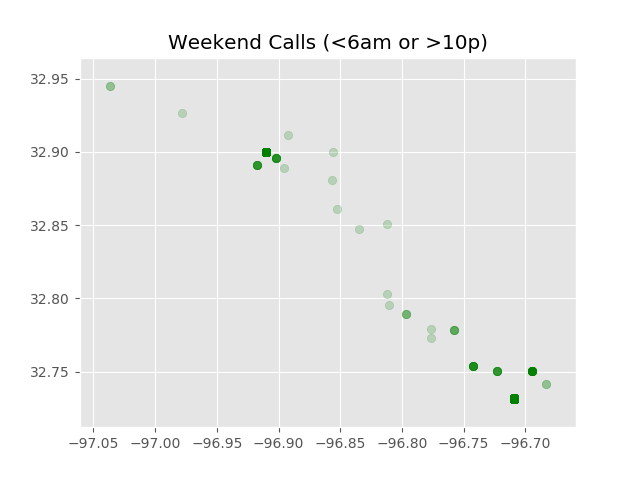

In [38]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(we.TowerLon,we.TowerLat, c='g', marker='o', alpha=0.2)
ax.set_title('Weekend Calls (<6am or >10p)')
showandtell()  # TODO: Comment this line out when you're ready to proceed

In [34]:
# On Weekdays:
#   1. People probably are at work during normal working hours
#   2. They probably are at home in the early morning and during the late night
#   3. They probably spend time commuting between work and home everyday
wd = user1[(user1.DOW != 'Sat') & (user1.DOW != 'Sun')]
wd = wd[(wd.CallTime < '07:00:00') | (wd.CallTime > '20:00:00')]; wd

,In,Out,Direction,CallDate,CallTime,DOW,Duration,TowerID,TowerLat,TowerLon
194,4638472273,4217121115,Incoming,2010-12-28,21:36:14.190286,Tue,0:05:56.080785,bcec0121-164d-406c-8c04-d12870893992,32.731611,-96.709417
201,4638472273,6022767590,Missed,2010-12-28,20:43:50.766312,Tue,0:03:23.651369,cd9f3b1a-2eb8-4cdb-86d1-5d4c2740b1dc,32.731722,-96.709500
249,4638472273,2145623768,Incoming,2010-12-29,06:02:11.319738,Wed,0:04:34.436752,9baa92e7-e990-4e9e-8c0a-4c17cb4ecc7c,32.731611,-96.709417
321,4638472273,2145623768,Incoming,2010-12-30,06:26:22.828987,Thr,0:02:18.762047,9baa92e7-e990-4e9e-8c0a-4c17cb4ecc7c,32.731611,-96.709417
325,4638472273,7756914135,Missed,2010-12-30,21:05:26.008063,Thr,0:02:08.590063,8ba7e0d7-eb6e-4828-9c70-c469954a627d,32.731611,-96.709417
404,4638472273,2666307251,Incoming,2010-12-31,20:40:56.233240,Fri,0:02:02.658376,aa753a06-cdb9-471b-bc26-dd84f0479421,32.911583,-96.892222
620,4638472273,7428841195,Incoming,2011-01-03,06:25:35.421417,Mon,0:01:45.847654,aeaf8b43-8034-44fe-833d-31854a75acbf,32.731722,-96.709500
621,4638472273,5481755331,Incoming,2011-01-03,22:44:00.785678,Mon,0:03:10.663981,2567c73b-3711-4a31-8683-9d12d56857d8,32.731611,-96.709417
757,4638472273,7922223441,Missed,2011-01-05,22:14:05.925483,Wed,0:00:42.504919,1bfc786a-d4c2-464c-bc45-b9aad0c81216,32.731722,-96.709500
858,4638472273,6150928001,Incoming,2011-01-07,22:48:47.825163,Fri,0:01:00.671636,26f7441e-e64b-4b9d-8c5a-0eb34f7e919f,32.731611,-96.709417


<IPython.core.display.Javascript object>


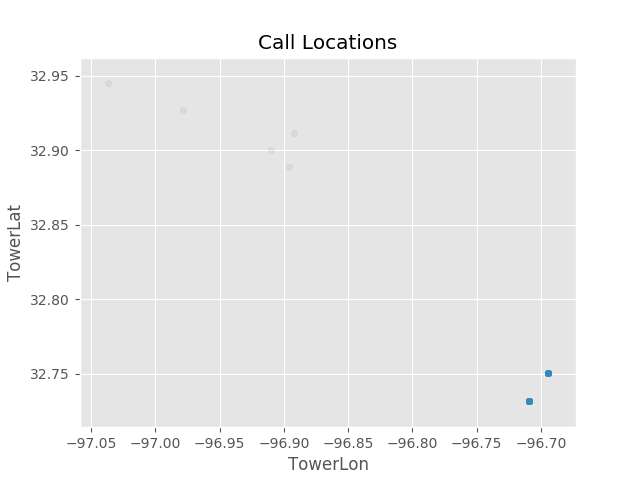

In [35]:
wd.plot.scatter(x='TowerLon', y='TowerLat', alpha=0.1, title='Call Locations')
showandtell()

<IPython.core.display.Javascript object>


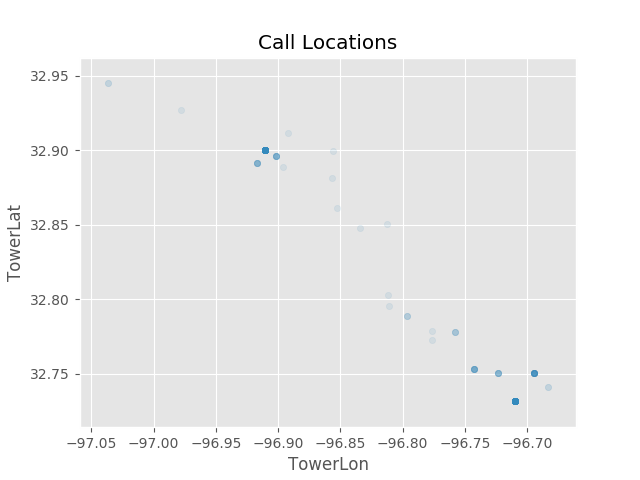

In [49]:
# join both df

#df = we[['TowerLat','TowerLon']].append(wd[['TowerLat','TowerLon']]);
df = we[['TowerLat','TowerLon']]; 
df.plot.scatter(x='TowerLon', y='TowerLat', alpha=0.1, title='Call Locations')
showandtell()

<IPython.core.display.Javascript object>


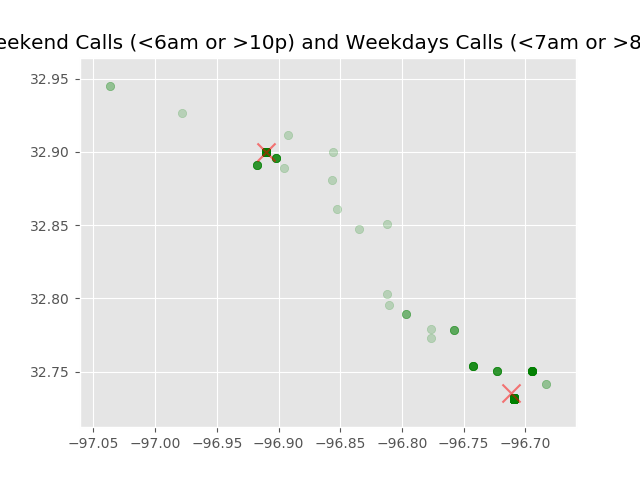

[[ 32.73511547 -96.71189578]
 [ 32.89970989 -96.91026348]]


In [52]:
# run K-Mean with K=1 and plot the centroids

# TODO: Use K-Means to try and find seven cluster centers in this dataframe.
kmeans_model = KMeans(n_clusters=2)
kmeans_model.fit(df)

# INFO: Print and plot the centroids...
centroids = kmeans_model.cluster_centers_

fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_title('Weekend Calls (<6am or >10p) and Weekdays Calls (<7am or >8pm)')
ax.scatter(df.TowerLon,df.TowerLat, c='g', marker='o', alpha=0.2)
ax.scatter(centroids[:,1], centroids[:,0], marker='x', c='red', alpha=0.5, linewidths=10, s=169)

showandtell() 
print(centroids)
